In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# California Household Median Income Prediction

The problem that we are going to solve here is that given a set of features that describe a house in California, our linear regression machine learning model must predict the median income for households within a block of houses. To train our machine learning model with California housing data, we will be using scikit-learn’s California dataset.

In this dataset, each row describes a California town or suburb. There are 20640 rows and 8 attributes (features) with a target column (MedInc).

In [2]:
# Importing the California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data)
df.columns = housing.feature_names
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


1. MedInc: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
2. HouseAge: Age of a house within a block; a lower number is a newer building
3. AveRooms: Average number of rooms within a block
4. AveBdrms: Average number of bedrooms within a block
5. Population: Total number of people residing within a block. 
6. AveOccup: Average occupations of the people within a block (measured in scale value)
7. Latitude: A measure of how far north a house is; a higher value is farther north
8. Longitude: A measure of how far west a house is; a higher value is farther west 

In [3]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_epochs = 100, random_state=1):
        self.eta = eta
        self.n_epochs = n_epochs
        self.random_state = random_state

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

    def fit(self, X, Y):
        # 1) intialize the weights and bias
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])

        # keeping track of the cost function value in each epoch
        self.costs_ = []

        #repeat for n_epochs
        for i in range(self.n_epochs):
            Y_hat = self.net_input(X)
            errors = Y_hat - Y
            self.costs_.append((errors**2).mean())
            
            dw = X.T.dot(errors)/X.shape[0]
            self.w_ -= self.eta * dw
            
            db = np.sum(errors)/X.shape[0]
            self.b_ -= self.eta * db
            
        return self

## 1. Data preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [5]:
df.shape

(20640, 8)

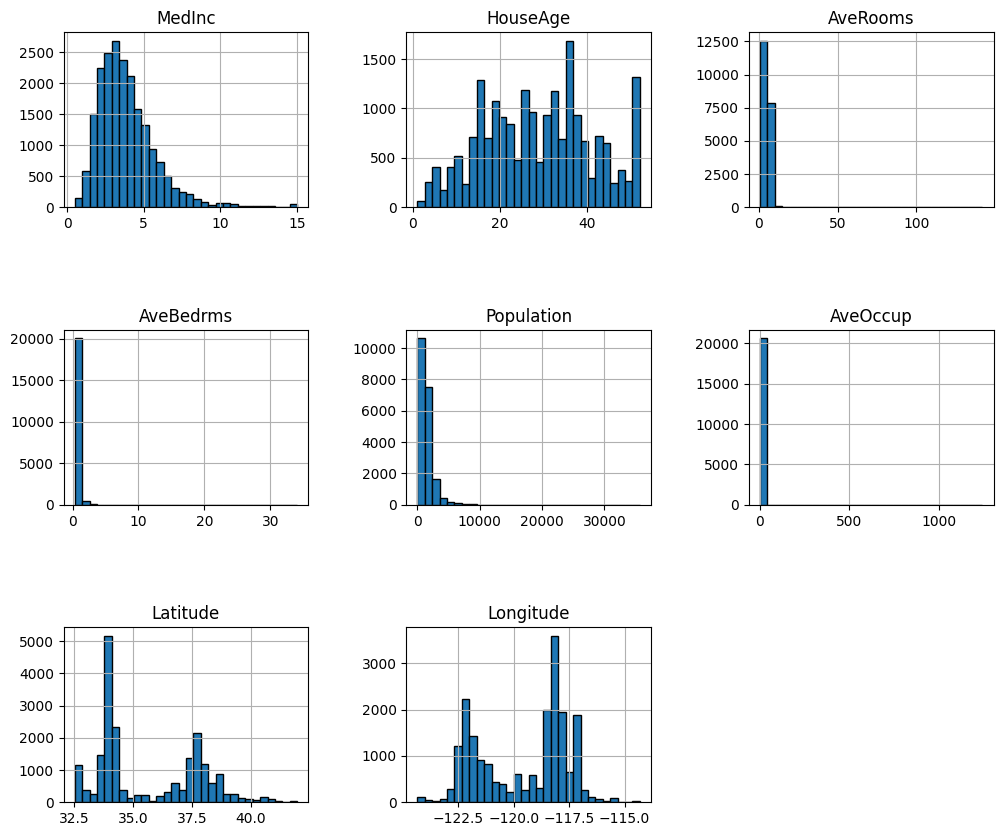

In [6]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [7]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

###  1.1 Check for missing data

If there are missing data, drop the rows with missing data
(Refer to our previous notebook 4_Data_Exploration_Part1.ipynb)

In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

### 1.2 Get Predictor Variables (X) and Target Variable (Y)

In [9]:
## TODO get the predictor variables (features) and transform them to a numpy array
## the predictor variables consist of all columns but 'MedInc'
X = df[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']].values 
X.shape

(20640, 7)

In [10]:
## TODO get the target variable and transform it a one-dimension numpy array
## 'MedInc' is the target variable 
Y = df['MedInc'].values
Y.shape

(20640,)

### 1.3 Divide the dataset into training and testing set

In [11]:
from sklearn.model_selection import train_test_split

# TODO: divide X and Y into 80 % training set and 20 % testing set
# Hint refer to our previous notebook 9_Linear_Regression.ipynb
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(16512, 7)
(4128, 7)


### 1.4 Applying standard scalar on the dataset before using it to fit linear regression model

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# TODO standardize X_train
# Hint: use the fit_transform method of the sc_x instance
X_train_std = sc_x.fit_transform(X_train)

# TODO standardize X_test
# Hint: use the transform method of the sc_x instance
X_test_std = sc_x.fit_transform(X_test)

# TODO standardize Y_train
# use the fit_transform method of the sc_y instance
# notice that the fit_transform method only accepts 2-d numpy array
# hence you need pass Y_train.reshape((-1,1)) as its argument
Y_train_std = sc_y.fit_transform(Y_train.reshape((-1,1)))

# flatten Y_train_std back to 1-d array
Y_train_std = Y_train_std.flatten()

# TODO standardize Y_test
# use the transform method of the sc_y instance
# the transform  method only accepts 2-d numpy array
# hence you need pass Y_test.reshape((-1,1)) as its argument
Y_test_std = sc_y.transform(Y_test.reshape((-1,1)))

# flatten Y_test_std back to 1-d array
Y_test_std = Y_test_std.flatten()

## 2. Train a Linear Regression Model

In [13]:
# TODO: create an instance of the LinearRegressionGD class implemented above
# set eta=0.1, n_epochs = 200, random_state=42
lr = LinearRegressionGD(eta=.1,n_epochs=200, random_state=42)

In [14]:
# TODO: train the model using X_train_std and Y_train_std
# Hint: use the fit method of lr
lr = lr.fit(X_train_std,Y_train_std)

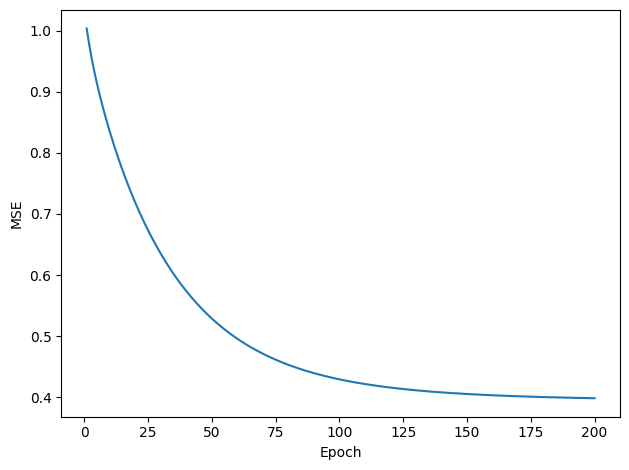

In [15]:
# plot the cost value (Mean Squared Error) over each iteration
plt.plot(range(1, lr.n_epochs+1), lr.costs_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [16]:
print(f'The MSE of the training set at the last epoch is {lr.costs_[-1]}')

The MSE of the training set at the last epoch is 0.3982532051682403


## 3. Evaluate the performance of the model over the standardize testing set

Since we train the model using standardized training set, it only makes sense to test it using standardized testing set.

In [17]:
# TODO: predict the output of X_test_std
# Hint use the predict method
Y_test_std_pred = lr.predict(X_test_std)

print(Y_test_std_pred)

[-0.64981443 -0.24314359 -0.83279009 ...  1.28228549 -0.15904447
 -0.37681611]


In [18]:
# TODO measure the performance of the linear regression model
# compute the mean squared error of the testing set
from sklearn.metrics import mean_squared_error
mse_test_std = mean_squared_error( Y_test_std_pred,Y_test_std)
print(f'MSE test standardized: {mse_test_std:.2f}')

MSE test standardized: 0.41


## 4. Predict the median income of a household

Suppose a household have the following information:
- HouseAge = 22
- AveRooms = 7
- AveBedrooms = 2
- Population = 2000
- Average Occupation = 3
- Latitude = 3.05
- Longitude = -122.0

Predict the median income of the household.

In [19]:
features = np.array([[22, 7, 2, 2000, 3, 3.05, -122.0]])

Since the model is trained using standardized data, we need to standardize the features.

In [20]:
# TODO standardize features 
# hint: use the transform method of the sc_x instance
features_std = sc_x.transform(features)
print(features_std)

[[ -0.54041762   0.57112579   1.48062657   0.51928757   0.01971874
  -15.25753441  -1.24390955]]


Now we can predict the standardized features.

In [21]:
# TODO predict the median income of features_std
# hint : use the predict method of the lr model
median_income_std = lr.predict(features_std)
print(median_income_std)

[8.84368475]


Notice that the predicted median income above is a standardized value.
The model lr was also trained with standardized target.
Thus, to get the real the predicted median income we need to get the inverse transform of the median_income_std. 

In [22]:
# TODO compute the real predicted median income
# Hint : use the inverse_transform method of the sc_y instance
# the inverse_transform only accepts a 2-d numpy array as its argument
# make sure to pass median_income_std.reshape((-1, 1))
median_income = sc_y.inverse_transform(median_income_std.reshape((-1,1)))

In [23]:
print(f'Predicted median income for the given household is ${median_income.flatten()[0]:.2f}K')

Predicted median income for the given household is $20.72K


# 5. Challenge: build another linear regression model with less features

In this section, train another linear regression model (lr2) using less features. 
For example, exclude latitude and langitude features. 

## 5.1 Preprocess data for lr2 model
1. Get `X` and `Y` from df
2. Split `X` and `Y` in to the training and testing sets
3. Standardize the training and testing sets

In [24]:
X = df[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']].values 

Y = df['MedInc'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(16512, 5)
(4128, 5)


In [25]:
# TODO standardize X_train
# Hint: use the fit_transform method of the sc_x instance
X_train_std = sc_x.fit_transform(X_train)

# TODO standardize X_test
# Hint: use the transform method of the sc_x instance
X_test_std = sc_x.fit_transform(X_test)

# TODO standardize Y_train
# use the fit_transform method of the sc_y instance
# notice that the fit_transform method only accepts 2-d numpy array
# hence you need pass Y_train.reshape((-1,1)) as its argument
Y_train_std = sc_y.fit_transform(Y_train.reshape((-1,1)))

# flatten Y_train_std back to 1-d array
Y_train_std = Y_train_std.flatten()

# TODO standardize Y_test
# use the transform method of the sc_y instance
# the transform  method only accepts 2-d numpy array
# hence you need pass Y_test.reshape((-1,1)) as its argument
Y_test_std = sc_y.transform(Y_test.reshape((-1,1)))

# flatten Y_test_std back to 1-d array
Y_test_std = Y_test_std.flatten()

## 5.2 Train lr2 model
Compare the mean squared error (MSE) of the lr's and lr2's training set. Which one has better (lower) MSE?

In [26]:
lr2 = LinearRegressionGD(eta=.1,n_epochs=200, random_state=42)
lr = lr.fit(X_train_std,Y_train_std)

# TODO: predict the output of X_test_std
# Hint use the predict method
Y_test_std_pred = lr.predict(X_test_std)

print(Y_test_std_pred)



[-0.39728188 -0.34720181 -0.8588838  ...  1.11054279  0.142052
 -0.49965055]


## 5.3 Evaluate the performance of the trained model over testing set
Compare the mean squared error (MSE) of the lr's and lr2's testing set. Which one has better (lower) MSE?

In [27]:
# TODO measure the performance of the linear regression model
# compute the mean squared error of the testing set
from sklearn.metrics import mean_squared_error
mse_test_std = mean_squared_error( Y_test_std_pred,Y_test_std)
print(f'MSE test standardized: {mse_test_std:.2f}')



MSE test standardized: 0.50


### I concluded that the second model(Lr2) has a higher Mean Squared Error than the second Model - .50 > .41. 

#### Therefore the first model is more accurate because it has the 2 additional predictor variables